In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tool import *

# 原始数据初步了解

In [20]:
dataset_raw = pd.read_csv("adultTest.csv")
dataset_raw = clear_space(dataset_raw)
pprint(dataset_raw.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')


1. age	年龄	double
* workclass	工作类型	string
* fnlwgt	序号	string
* education	教育程度	string
* education_num	受教育时间	double
* maritial-status	婚姻状况	string
* occupation	职业	string
* relationship	关系	string
* race	种族	string
* sex	性别	string
* capital-gain	资本收益	string
* capital-loss	资本损失	string
* hours-per-week	每周工作小时数	double
* native-country	原籍	string
* class	收入类型	string

In [21]:
dataset_raw.rename(columns= {'age':'年龄',
                             'workclass':'工作类型', 
                             'fnlwgt':'序号', 
                             'education':'教育程度', 
                             'education-num':'受教育时间', 
                             'marital-status':'婚姻状况',
                             'occupation':'职业', 
                             'relationship':'关系',
                             'race':'种族', 
                             'sex': '性别', 
                             'capital-gain':'资本收益', 
                             'capital-loss':'资本损失', 
                             'hours-per-week':'每周工作小时数', 
                             'native-country':'原籍',
                             'class':'收入类型'}, inplace=True)

In [22]:
birdview(dataset_raw)

---整体数据概况---
(32561, 15)


,values,unique,type,count,isnull
收入类型,['<=50K' '>50K'],2,object,32561,0
职业,['Adm-clerical' 'Exec-managerial' 'Handlers-cl...,15,object,32561,0
教育程度,['Bachelors' 'HS-grad' '11th' 'Masters' '9th' ...,16,object,32561,0
性别,['Male' 'Female'],2,object,32561,0
婚姻状况,['Never-married' 'Married-civ-spouse' 'Divorce...,7,object,32561,0
关系,['Not-in-family' 'Husband' 'Wife' 'Own-child' ...,6,object,32561,0
工作类型,['State-gov' 'Self-emp-not-inc' 'Private' 'Fed...,9,object,32561,0
种族,['White' 'Black' 'Asian-Pac-Islander' 'Amer-In...,5,object,32561,0
受教育时间,[13 9 7 14 5 10 12 11 4 16 15 3 6 2 1 8],16,int64,32561,0
年龄,too much,73,int64,32561,0


In [23]:
valueview(dataset_raw)

---定值数据概况---


,count,mean,std,min,25%,50%,75%,max,skew,kurt,type,isnull
年龄,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0,0.558743,-0.166127,int64,0
序号,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0,1.446980,6.218811,int64,0
受教育时间,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0,-0.311676,0.623444,int64,0
资本收益,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0,11.953848,154.799438,int64,0
资本损失,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0,4.594629,20.376802,int64,0
每周工作小时数,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0,0.227643,2.916687,int64,0


In [24]:
catview(dataset_raw)

---定性数据概况---
工作类型: 9个类别
{'?': 1836,
 'Federal-gov': 960,
 'Local-gov': 2093,
 'Never-worked': 7,
 'Private': 22696,
 'Self-emp-inc': 1116,
 'Self-emp-not-inc': 2541,
 'State-gov': 1298,
 'Without-pay': 14}
教育程度: 16个类别
{'10th': 933,
 '11th': 1175,
 '12th': 433,
 '1st-4th': 168,
 '5th-6th': 333,
 '7th-8th': 646,
 '9th': 514,
 'Assoc-acdm': 1067,
 'Assoc-voc': 1382,
 'Bachelors': 5355,
 'Doctorate': 413,
 'HS-grad': 10501,
 'Masters': 1723,
 'Preschool': 51,
 'Prof-school': 576,
 'Some-college': 7291}
婚姻状况: 7个类别
{'Divorced': 4443,
 'Married-AF-spouse': 23,
 'Married-civ-spouse': 14976,
 'Married-spouse-absent': 418,
 'Never-married': 10683,
 'Separated': 1025,
 'Widowed': 993}
职业: 15个类别
{'?': 1843,
 'Adm-clerical': 3770,
 'Armed-Forces': 9,
 'Craft-repair': 4099,
 'Exec-managerial': 4066,
 'Farming-fishing': 994,
 'Handlers-cleaners': 1370,
 'Machine-op-inspct': 2002,
 'Other-service': 3295,
 'Priv-house-serv': 149,
 'Prof-specialty': 4140,
 'Protective-serv': 649,
 'Sales': 3650,
 'Tech-

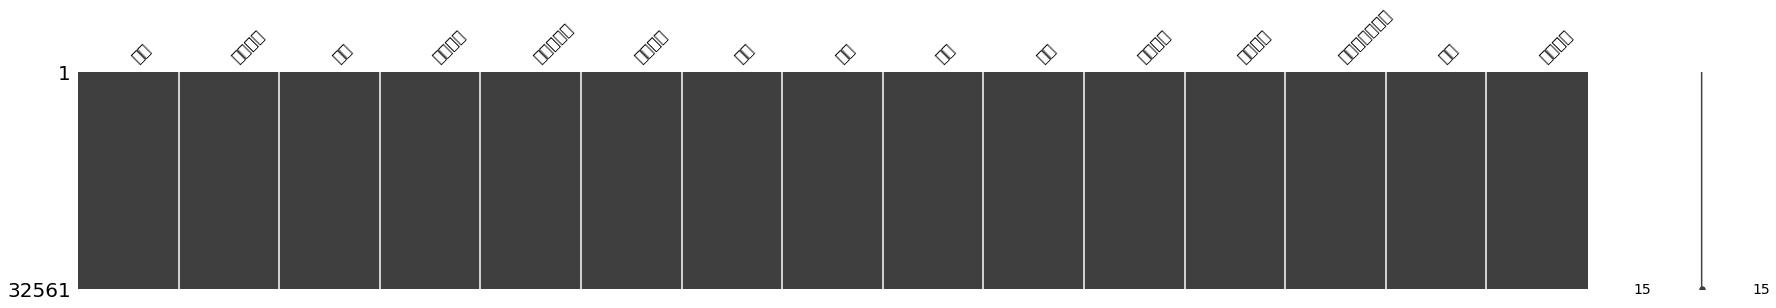

In [25]:
# 缺失值显示
import missingno
missingno.matrix(dataset_raw, figsize = (30,4))

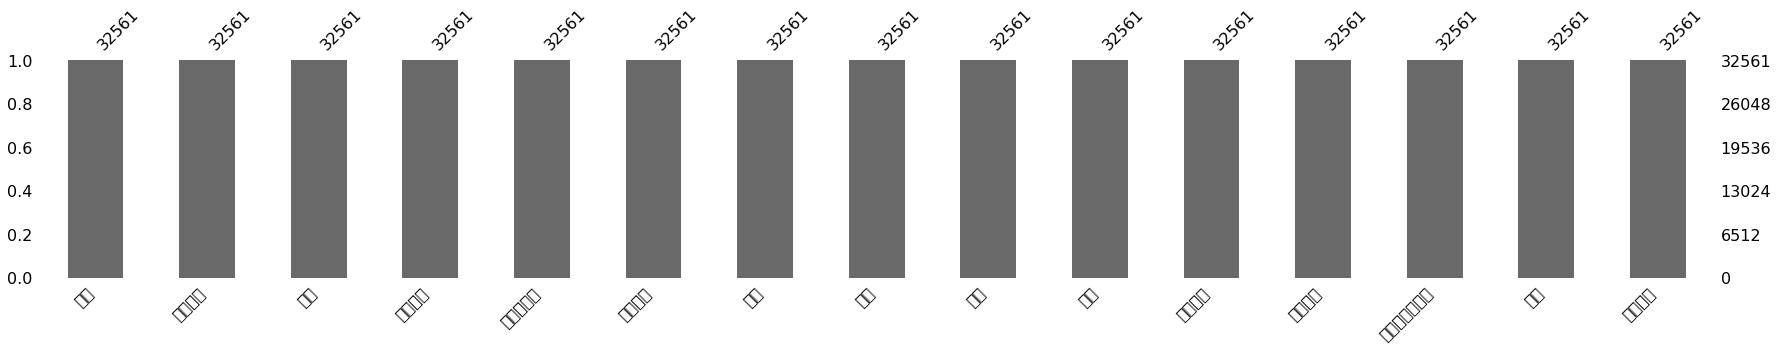

In [26]:
missingno.bar(dataset_raw, sort='ascending', figsize = (30,4))

# 数据处理

* 独热编码
* 数据划分

In [16]:
for col in dataset_raw.columns:
    if dataset_raw[col].dtype == 'O':
            print(col)
print(dataset_raw['class'].unique())

工作类型
教育程度
婚姻状况
职业
关系
种族
性别
原籍
收入类型


KeyError: 'class'

In [ ]:
dateset = pd.get_dummies(data = dataset_raw,
                         columns = ["workclass", "education", "marital-status",
                                    "occupation","relationship", "native-country",
                                    "race", "sex"])
dateset.loc[dateset['class'] == '<=50K','target'] = 0
dateset.loc[dateset['class'] != '<=50K','target'] = 1
dateset.drop(['class'], axis=1, inplace=True)

In [ ]:
xdata = dateset.drop(['target'],axis = 1)
ydata = dateset['target']
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.30, random_state=24) # 训练集&测试集

# 初步建模

In [ ]:
# Logistic回归
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# 树模型
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
# 随机森林
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, RandomTreesEmbedding
# boosting分类
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# Bagging分类
from sklearn.ensemble import BaggingClassifier
# adaboost分类
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_scores = model.predict_proba(X_test)[:,1]  # 用于ROC曲线的

In [ ]:
metrics_Classifier(model, X_test, y_test, y_pred, y_scores)

In [ ]:
plot_roc(y_test, y_scores)

# 开始分析

In [ ]:
# 单特征展示
import math
import seaborn as sns
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            #直方图，频数
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(dataset_raw, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

# 数据优化处理

* 基本处理
    * 异常值
    * 缺失值 

* 定性数据
    * 类别清洗
    
* 定值数据
    * 区间切分
    * 标准化
    
* 日期/时间数据


## 基本处理

## 定性数据

In [17]:
dataset_raw['workclass'].value_counts()

KeyError: 'workclass'

In [18]:
# 种类有些太多了，有些类似的要进行合并
dataset_raw['workclass'].replace({'Without-pay':'Not Working', 'Never-worked':'Not Working', 
                                  'State-gov':'Non-fed-gov', 'Local-gov':'Non-fed-gov',
                                  'Self-emp-not-inc':'Self-emp', 
                                  'Self-emp-inc':'Self-emp',
                                  'Federal-gov':'Fed-gov',
                                  '?':pd.NaT},
                                 inplace=True)

KeyError: 'workclass'

In [6]:
dataset_raw['workclass'].value_counts()

Private        22696
Self-emp        3657
Non-fed-gov     3391
Fed-gov          960
Not Working       21
Name: workclass, dtype: int64

---

In [152]:
dataset_raw['education'].value_counts()

HS-grad        10501
HS-Graduate     7291
Bachelors       5355
Dropout         4253
Associate       2449
Masters         1723
Professor        576
Doctorate        413
Name: education, dtype: int64

In [153]:
dataset_raw.loc[dataset_raw['education'] == '10th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '11th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '12th'          , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '1st-4th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '5th-6th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '7th-8th'       , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == '9th'           , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm'    , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc'     , 'education'] = 'Associate'
dataset_raw.loc[dataset_raw['education'] == 'Bachelors'     , 'education'] = 'Bachelors'
dataset_raw.loc[dataset_raw['education'] == 'Doctorate'     , 'education'] = 'Doctorate'
dataset_raw.loc[dataset_raw['education'] == 'HS-Grad'       , 'education'] = 'HS-Graduate'
dataset_raw.loc[dataset_raw['education'] == 'Masters'       , 'education'] = 'Masters'
dataset_raw.loc[dataset_raw['education'] == 'Preschool'     , 'education'] = 'Dropout'
dataset_raw.loc[dataset_raw['education'] == 'Prof-school'   , 'education'] = 'Professor'
dataset_raw.loc[dataset_raw['education'] == 'Some-college'  , 'education'] = 'HS-Graduate'

In [154]:
dataset_raw['education'].value_counts()

HS-grad        10501
HS-Graduate     7291
Bachelors       5355
Dropout         4253
Associate       2449
Masters         1723
Professor        576
Doctorate        413
Name: education, dtype: int64

---

In [155]:
dataset_raw['marital-status'].value_counts()

Married          14999
Never-Married    10683
Separated         5468
Widowed            993
Not-Married        418
Name: marital-status, dtype: int64

In [156]:
dataset_raw.loc[dataset_raw['marital-status'] == 'Never-married'        , 'marital-status'] = 'Never-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-AF-spouse'    , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-civ-spouse'   , 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Not-Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Separated'            , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Divorced'             , 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Widowed'              , 'marital-status'] = 'Widowed'

In [157]:
dataset_raw['marital-status'].value_counts()

Married          14999
Never-Married    10683
Separated         5468
Widowed            993
Not-Married        418
Name: marital-status, dtype: int64

---

In [158]:
dataset_raw['occupation'].value_counts()

Manual Labour    10062
Office Labour     8644
Professional      4140
Admin             3770
Service           3444
Military           658
Name: occupation, dtype: int64

In [159]:
dataset_raw.loc[dataset_raw['occupation'] == 'Adm-clerical', 'occupation'] = 'Admin'
dataset_raw.loc[dataset_raw['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Craft-repair', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Exec-managerial', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Farming-fishing', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Prof-specialty', 'occupation'] = 'Professional'
dataset_raw.loc[dataset_raw['occupation'] == 'Protective-serv', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Sales', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Tech-support', 'occupation'] = 'Office Labour'
dataset_raw.loc[dataset_raw['occupation'] == 'Transport-moving', 'occupation'] = 'Manual Labour'
dataset_raw.loc[dataset_raw['occupation'] == '?', 'occupation'] = pd.NaT

In [160]:
dataset_raw['occupation'].value_counts()

Manual Labour    10062
Office Labour     8644
Professional      4140
Admin             3770
Service           3444
Military           658
Name: occupation, dtype: int64

---

In [161]:
dataset_raw['native-country'].value_counts()

United-States           29170
South-America            1415
British-Commonwealth      347
SE-Asia                   320
Euro_Group_2              278
Euro_Group_1              240
China                     146
APAC                       62
Name: native-country, dtype: int64

In [162]:
dataset_raw.loc[dataset_raw['native-country'] == 'Cambodia'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Canada'                      , 'native-country'] = 'British-Commonwealth'    
dataset_raw.loc[dataset_raw['native-country'] == 'China'                       , 'native-country'] = 'China'       
dataset_raw.loc[dataset_raw['native-country'] == 'Columbia'                    , 'native-country'] = 'South-America'    
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba'                        , 'native-country'] = 'South-America'        
dataset_raw.loc[dataset_raw['native-country'] == 'Dominican-Republic'          , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Ecuador'                     , 'native-country'] = 'South-America'     
dataset_raw.loc[dataset_raw['native-country'] == 'El-Salvador'                 , 'native-country'] = 'South-America' 
dataset_raw.loc[dataset_raw['native-country'] == 'England'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'France'                      , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Germany'                     , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Greece'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Guatemala'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Haiti'                       , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Holand-Netherlands'          , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Honduras'                    , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Hong'                        , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Hungary'                     , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'India'                       , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Iran'                        , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Ireland'                     , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Italy'                       , 'native-country'] = 'Euro_Group_1'
dataset_raw.loc[dataset_raw['native-country'] == 'Jamaica'                     , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Japan'                       , 'native-country'] = 'APAC'
dataset_raw.loc[dataset_raw['native-country'] == 'Laos'                        , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Mexico'                      , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Nicaragua'                   , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Outlying-US(Guam-USVI-etc)'  , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Peru'                        , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Philippines'                 , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Poland'                      , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Portugal'                    , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Puerto-Rico'                 , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'Scotland'                    , 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'South'                       , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == 'Taiwan'                      , 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Thailand'                    , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Trinadad&Tobago'             , 'native-country'] = 'South-America'
dataset_raw.loc[dataset_raw['native-country'] == 'United-States'               , 'native-country'] = 'United-States'
dataset_raw.loc[dataset_raw['native-country'] == 'Vietnam'                     , 'native-country'] = 'SE-Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Yugoslavia'                  , 'native-country'] = 'Euro_Group_2'
dataset_raw.loc[dataset_raw['native-country'] == '?'                           , 'native-country'] = pd.NaT

In [163]:
dataset_raw['native-country'].value_counts()

United-States           29170
South-America            1415
British-Commonwealth      347
SE-Asia                   320
Euro_Group_2              278
Euro_Group_1              240
China                     146
APAC                       62
Name: native-country, dtype: int64

## 定值数据

# 数据预处理

[scikit-learn模块学习笔记(数据预处理模块preprocessing)](https://www.cnblogs.com/MrFiona/p/7900355.html)

使用类的好处在于可以保存训练集中的参数（均值、方差）直接使用其对象转换测试集数据——也可以加入pipeline

# 再次建模对比

In [164]:
dateset = pd.get_dummies(data = dataset_raw,
                         columns = ["workclass", "education", "marital-status",
                                    "occupation","relationship", "native-country",
                                    "race", "sex"])
dateset.loc[dateset['class'] == '<=50K','target'] = 0
dateset.loc[dateset['class'] != '<=50K','target'] = 1
dateset.drop(['class'], axis=1, inplace=True)

In [165]:
xdata = dateset.drop(['target'],axis = 1)
ydata = dateset['target']
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.30, random_state=24) # 训练集&测试集

In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_scores = model.predict_proba(X_test)[:,1]  # 用于ROC曲线的

In [170]:
metrics_Classifier(model, X_test, y_test, y_pred, y_scores)

自带评分:0.8641621455624936
-------------------------
准确率:0.8641621455624936
召回率:0.6232247284878863
F1评分:0.6921827882161911
ROC/AUC:0.92141157979695
kappa评分:0.6063992286999922
-------------------------
混淆矩阵
[[6950  425]
 [ 902 1492]]
-------------------------
分类报告
             precision    recall  f1-score   support

        0.0       0.89      0.94      0.91      7375
        1.0       0.78      0.62      0.69      2394

avg / total       0.86      0.86      0.86      9769



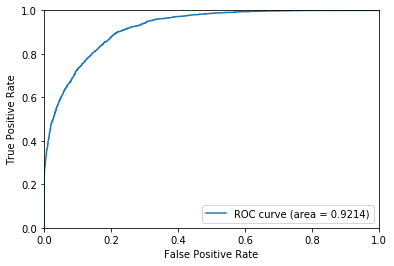

In [171]:
plot_roc(y_test, y_scores)